In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

## Распределения.

Многие классические распределения представлены в scipy.stats при помощи классов.  
Например stats.uniform -- класс соответствующий равномерному распределению.

Документация по распределениям в scipy.stats просто ужасна. Функция help(...) просто неюзабельна (лучше ее не спрашивать, а сразу гуглить). Потому я и сделал эту шпаргалку.

### Инициализация распределений

stats.uniform(-1, 2) -- объект соответствующий равномерному распределению на отрезке $[-1, 1]$.  
Обычно распределения для инициализации принимают 2 параметра loc и scale, которые для разных распределений имеют свой смысл.  
Но в общих чертах loc задает насколько "сдвинуто" распределение, а scale -- насколько растянуто.  
Например для равномерного распределение на отрезке $[a, b]$ loc равен $a$, а scale равен $b - a$.  
А для нормального loc и scale задают матожидание и стандартное отклонение.


In [2]:
distr = stats.uniform(-1, 2)

### Что умеют распределения
Во первых из них можно сэмплировать

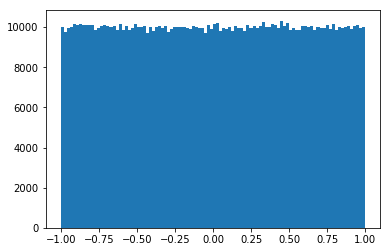

In [3]:
sample_size = 10 ** 6
# Возьмем выборку независимых сэмплов размера sample_size. В качестве размера может быть tuple
sample = distr.rvs(sample_size)

plt.hist(sample, bins=100)
plt.show()

А еще распределения знают про себя кучу полезной информации:
* distr.pdf(x) -- значения функции плотности в точках массива x. (для непрерывных распределений)
* distr.pmf(x) -- вероятности точек массива x. (для дискретных распределений)
* distr.cdf(x) -- значения функции распределения в точках массива x.
* distr.ppf(alpha) -- alpha-тая квантиль. (т. е. вероятность того, что distr.rvs() < distr.ppf(0.05) равна 0.05).
* distr.mean() (а также median, var, std) -- среднее, медиана, дисперсия, стандартное отклонение.


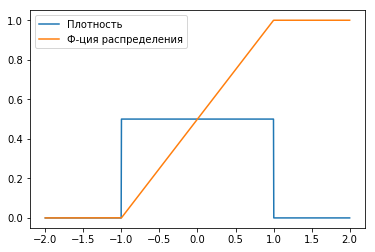

In [4]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, distr.pdf(x), label="Плотность")
plt.plot(x, distr.cdf(x), label="Ф-ция распределения")
plt.legend()
plt.show()

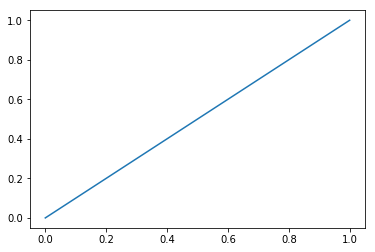

In [5]:
# Проверим что distr.ppf и distr.cdf обратны дуг другу:
probs = np.linspace(0, 1, 1001)
probs2 = distr.cdf(distr.ppf(probs))
assert np.allclose(probs, probs2)
plt.plot(probs, probs2)
plt.show()

In [6]:
print(np.sum(sample < distr.ppf(0.1)) / sample_size)

0.100497


## Статистические тесты

Для стат. тестов документация значительно лучше, поэтому буду краток.  
Обычно тесты возврашают как результат пару (значение статистики, pvalue).  
Если у теста есть однохвостный/двухвостый вариант, его можно задать опцией alternative (возможные значения "two-sided", "less", "greater")


### Покидаем нечестную монетку

In [7]:
n_tosses = 100
n_heads = stats.binom(n_tosses, 0.4).rvs()

print('pvalue для H1 "Вероятность орла меньше 0.5": {}'.format(
    stats.binom_test(n_heads, n_tosses, alternative="less")
))
print('pvalue для H1 "Вероятность орла не равна 0.5": {}'.format(
    stats.binom_test(n_heads, n_tosses, alternative="two-sided")
))
print('pvalue для H1 "Вероятность орла больше 0.5": {}'.format(
    stats.binom_test(n_heads, n_tosses, alternative="greater")
))


pvalue для H1 "Вероятность орла меньше 0.5": 0.010489367838925859
pvalue для H1 "Вероятность орла не равна 0.5": 0.020978735677851718
pvalue для H1 "Вероятность орла больше 0.5": 0.9939835121373183
